In [55]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
print(X)
y = heart_disease.data.targets



     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [56]:
y["num"].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Średnie oraz odchylenia cech liczbowych

In [57]:
x_numeric = X[["age", "trestbps", "chol", "thalach", "oldpeak","ca"]]

In [58]:
# std
x_numeric.std(axis=0)

age          9.038662
trestbps    17.599748
chol        51.776918
thalach     22.875003
oldpeak      1.161075
ca           0.937438
dtype: float64

In [59]:
# mean
x_numeric.mean(axis=0)

age          54.438944
trestbps    131.689769
chol        246.693069
thalach     149.607261
oldpeak       1.039604
ca            0.672241
dtype: float64

Test na rozkład normalny(  Test Shapiro-Wilka)


age stat:  0.9864628911018372 p:  0.0060672517865896225 Not normal distribution


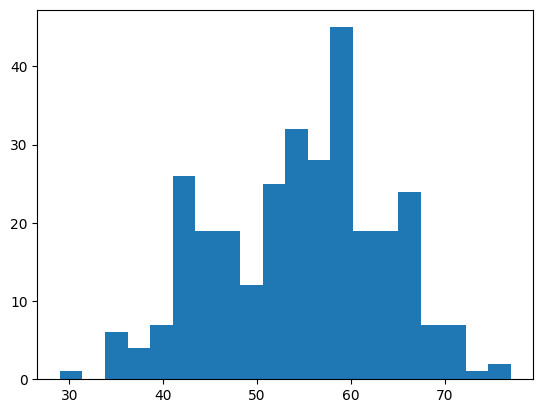

trestbps stat:  0.9665440917015076 p:  1.8012971167991054e-06 Not normal distribution


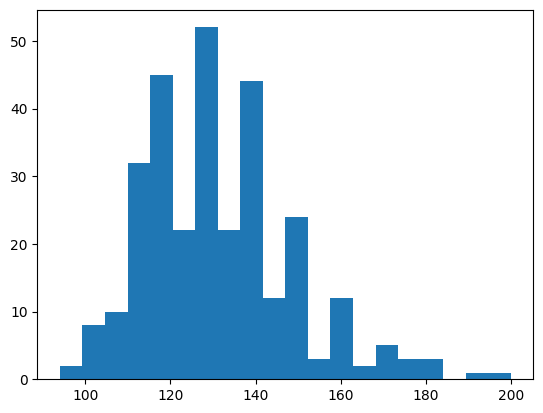

chol stat:  0.9472531676292419 p:  5.910671063702466e-09 Not normal distribution


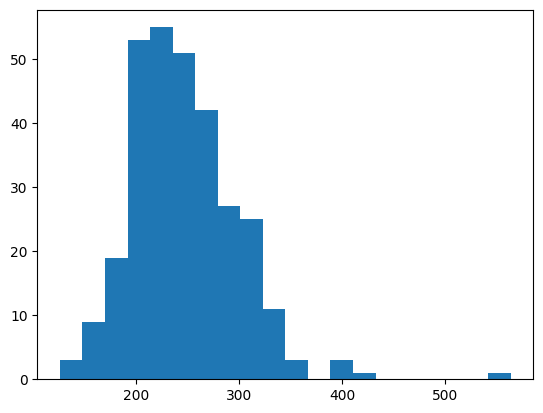

thalach stat:  0.9764528870582581 p:  6.997911259531975e-05 Not normal distribution


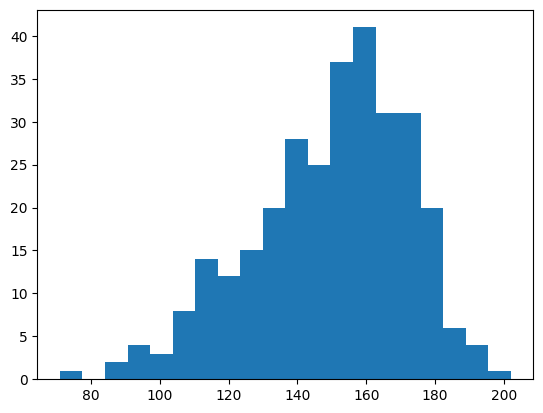

oldpeak stat:  0.8441835045814514 p:  8.183467206576554e-17 Not normal distribution


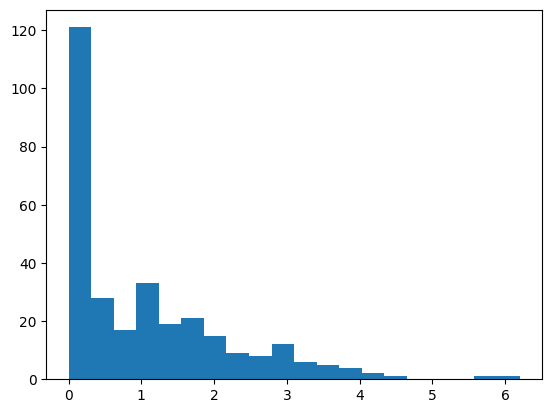

ca stat:  nan p:  1.0 Normal distribution


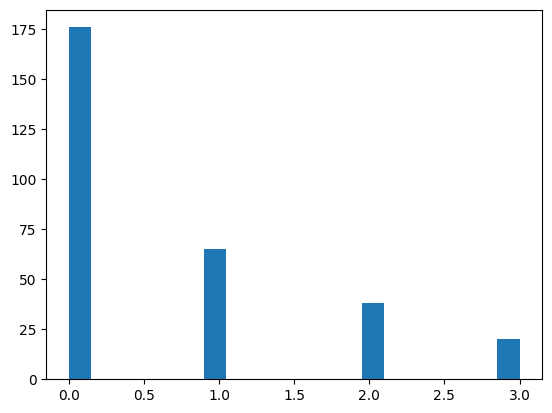

In [60]:
from scipy.stats import shapiro,probplot
import matplotlib.pyplot as plt
#iterate over x_numeric columns
for col in x_numeric.columns:
    stat, p = shapiro(x_numeric[col])
    alpha = 0.05
    if p > alpha:
        print(col, "stat: ", stat, "p: ", p, "Normal distribution")
    else:
        print(col, "stat: ", stat, "p: ", p, "Not normal distribution")
    #plot value of column
    plt.hist(x_numeric[col],bins=20)
    #plt.plot(x_numeric[col],x_numeric["age"],"o")
    plt.show()




In [61]:
x_categories=X[["sex",'cp','fbs','restecg','exang','slope','ca','thal']]
for col in x_categories:
    print(col, "value counts: ", x_categories[col].value_counts())


sex value counts:  sex
1    206
0     97
Name: count, dtype: int64
cp value counts:  cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64
fbs value counts:  fbs
0    258
1     45
Name: count, dtype: int64
restecg value counts:  restecg
0    151
2    148
1      4
Name: count, dtype: int64
exang value counts:  exang
0    204
1     99
Name: count, dtype: int64
slope value counts:  slope
1    142
2    140
3     21
Name: count, dtype: int64
ca value counts:  ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
thal value counts:  thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64


In [62]:
#convert X to np array
X_num_np = x_numeric.to_numpy()
print(X_num_np.shape)
#x_numeric.columns

(303, 6)
